In [1]:
# basic
import numpy as np
import pandas as pd

# get data
import pandas_datareader as pdr

# visual
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#requests
import requests

In [47]:
def remove_td(column):
    remove_one = column.split('<')
    remove_two = remove_one[0].split('>')
    return remove_two[1].replace(",", "")

def is_float(input):
  try:
    num = float(input)
  except ValueError:
    return False
  return True

def translate_dataFrame(response):
     # 拆解內容
    table_array = response.split('<table')
    tr_array = table_array[1].split('<tr')
    
    # 拆解td
    data = []
    index = []
    column = []
    for i in range(len(tr_array)):
        td_array = tr_array[i].split('<td')
        if(len(td_array)>1):
            code = remove_td(td_array[1])
            name = remove_td(td_array[2])
            revenue  = remove_td(td_array[3])
            profitRatio = remove_td(td_array[4])
            profitMargin = remove_td(td_array[5])
            preTaxIncomeMargin = remove_td(td_array[6])
            afterTaxIncomeMargin = remove_td(td_array[7])
            if(is_float(code)):
                data.append([code, revenue, profitRatio, profitMargin, preTaxIncomeMargin, afterTaxIncomeMargin])
                index.append(name)
            if( i == 1 ):
                column.append(code)
                column.append(revenue)
                column.append(profitRatio)
                column.append(profitMargin)
                column.append(preTaxIncomeMargin)
                column.append(afterTaxIncomeMargin)
                
    return pd.DataFrame(data=data, index=index, columns=column, dtype='float64')



In [48]:
def financial_statement(year, season):

    if year >= 1000:
        year -= 1911
        
    url = 'http://mops.twse.com.tw/mops/web/ajax_t163sb06'
    form_data = {
        'encodeURIComponent':1,
        'step':1,
        'firstin':1,
        'off':1,
        'TYPEK':'sii',
        'year': year,
        'season': season,
    }

    response = requests.post(url,form_data)
    response.encoding = 'utf8'
    
    df = translate_dataFrame(response.text)
    return df

In [49]:
stock = financial_statement(107,2)
stock = stock.astype(float)
stock.head()

,公司代號,營業收入,毛利率(%),營業利益率(%),稅前純益率(%),稅後純益率(%)
台泥,1101.0,57500.25,27.93,23.70,25.11,18.39
亞泥,1102.0,39009.09,23.92,19.80,25.22,19.95
嘉泥,1103.0,1000.93,14.47,-2.18,21.22,44.12
環球水泥,1104.0,2314.86,11.46,3.09,20.64,17.64
幸福水泥,1108.0,1684.25,3.70,-1.94,-2.01,-0.48


In [50]:
stock.loc['一零四']

公司代號        3130.00
營業收入         782.06
毛利率(%)        89.89
營業利益率(%)      21.27
稅前純益率(%)      22.96
稅後純益率(%)      18.55
Name: 一零四, dtype: float64

In [51]:
stock.loc[['華新科','一零四']]

,公司代號,營業收入,毛利率(%),營業利益率(%),稅前純益率(%),稅後純益率(%)
華新科,2492.0,18026.65,48.97,40.55,42.15,33.37
一零四,3130.0,782.06,89.89,21.27,22.96,18.55


In [52]:
stock['毛利率(%)'].describe()

count     881.000000
mean       20.243167
std        39.691657
min     -1000.000000
25%        10.990000
50%        19.310000
75%        29.870000
max        99.820000
Name: 毛利率(%), dtype: float64

In [53]:
stock['毛利率(%)']

台泥         27.93
亞泥         23.92
嘉泥         14.47
環球水泥       11.46
幸福水泥        3.70
信大水泥       29.27
東泥          8.58
味全公司       30.19
味王公司       32.76
大成長城       14.25
大飲         10.39
卜蜂企業       13.20
統一         34.10
愛之味        33.01
泰山企業       17.79
福壽實業        8.66
台榮         13.74
福懋油         8.81
佳格         29.62
聯華實業       16.45
聯華食品       20.48
大統益        10.61
天仁         57.91
黑松         24.24
興泰         -0.55
宏亞食品       24.40
鮮活果汁-KY    33.88
綠悅-KY       2.25
台塑         17.89
南亞塑膠       16.28
           ...  
台灣櫻花       34.15
偉聯         30.91
美利達        12.02
中保         36.84
欣天然        26.87
康那香        15.49
巨大機械       19.12
台灣福興       18.69
新光保全       33.20
新海瓦斯       22.55
泰銘          9.70
中視        -17.32
秋雨          8.34
中聯資源       15.48
欣高         21.27
中鼎工程        7.18
成霖企業       25.55
慶豐富        18.91
全國         10.61
台灣百和       38.14
宏全         18.89
信義房屋       27.67
裕融企業       44.75
茂順         34.52
好樂迪        58.79
新麗企業       23.45
潤泰創新       26.71
三發地產       30.

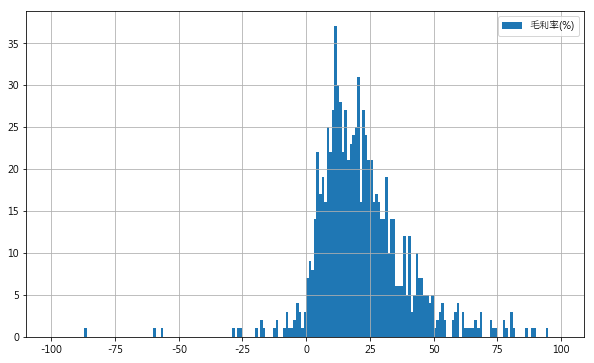

In [59]:
plt.rcParams['axes.unicode_minus']=False
fig = plt.figure(figsize=(10, 6))
stock['毛利率(%)'].hist(bins=range(-100,100) , label="毛利率(%)")
plt.legend()
fig.savefig('day26_05.png')

In [64]:
cond1 = stock['毛利率(%)'] > 30
cond2 = stock['營業利益率(%)'] > 30
stock[cond1 & cond2]


,公司代號,營業收入,毛利率(%),營業利益率(%),稅前純益率(%),稅後純益率(%)
勤益投控,1437.0,308.26,74.26,57.44,58.49,47.48
川湖,2059.0,2205.44,53.00,39.65,51.43,40.32
為升,2231.0,2042.40,47.19,31.39,33.21,27.37
國巨,2327.0,30270.59,59.48,50.89,57.41,49.91
台積電,2330.0,481355.48,49.11,37.66,38.96,33.67
海悅,2348.0,445.20,61.42,43.25,46.13,45.98
南亞科,2408.0,43389.66,53.65,45.70,47.77,42.72
可成科技,2474.0,41161.42,42.00,32.49,48.63,35.23
華新科,2492.0,18026.65,48.97,40.55,42.15,33.37
宏盛,2534.0,6160.90,43.79,39.92,40.80,39.96
